In [8]:
import numpy as np
import sys
import timeit
import matplotlib.pyplot as plt
sys.setrecursionlimit(int(1e9))

In [2]:
def gen(v, p):
    m = np.random.rand(v,v)
    m = (m + m.T)/2 * (1 - np.diag(np.ones(v)))
    return m > (1 - p)

def convert(m):
    inds, edges = np.where(m)
    res = np.empty((m.shape[0],0)).tolist()
    for i, k in enumerate(inds):
        res[k].append(edges[i])
    return res

def dfs_slow(v, g, visited):
    if visited[v]: return
    visited[v] = True
    for u, have_edge in enumerate(g[v]):
        if have_edge and not visited[u]:
            dfs_slow(u,g,visited)

def dfs_fast(v,g,visited):
    if visited[v]: return
    visited[v] = True
    for u in g[v]:
        if not visited[u]:
            dfs_slow(u,g,visited)

In [3]:
def test(n, p, repeats=5):
    g1 = gen(n,p)
    g2 = convert(g1)
    start_vs = np.random.randint(n, size = 1000)
    slow_t = timeit.timeit('for v in start_vs: dfs_slow(v, g1, np.zeros(n, dtype=bool).tolist())', globals={**globals(), **locals()}, number=repeats)/repeats
    fast_t = timeit.timeit('for v in start_vs: dfs_fast(v, g2, np.zeros(n, dtype=bool).tolist())', globals={**globals(), **locals()}, number=repeats)/repeats
    return slow_t, fast_t

In [ ]:
s, f = [], []
n = 100
for p in np.linspace(0,1,10):
    t0, t1 = test(n,p);
    s.append(t0)
    f.append(t1)

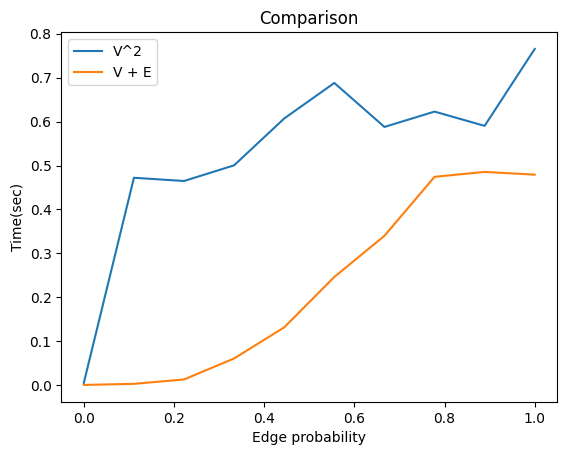

In [23]:
plt.plot(np.linspace(0,1,10), s, label='V^2')
plt.plot(np.linspace(0,1,10), f, label='V + E')
plt.title('Comparison')
plt.xlabel("Edge probability")
plt.ylabel("Time(sec)")
plt.legend(loc="upper left")
plt.show()